# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents several direct marketing campaigns of a Portuguese banking institution. According to the UCI description, the data relates to phone calls from a Portuguese bank from May 2008 to November 2010, a total of 17 campaigns. The marketing campaigns were based on phone calls, and often required multiple contacts with the same client to determine if they would subscribe to a bank term deposit.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# For reproducibility
np.random.seed(42)

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Looking at the dataset, there are no explicit missing values. However, the dataset description mentions that some categorical features have an "unknown" category, which effectively represents missing information. These features include:

- job
- marital
- education
- default
- housing
- loan

The data types seem appropriate: 
- Numerical features are stored as int64 or float64
- Categorical features are stored as object

I doesn't see we need any immediate type conversions for analysis.

In [4]:
# Check distribution of 'unknown' values in categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    unknown_count = df[df[feature] == 'unknown'].shape[0]
    if unknown_count > 0:
        print(f"{feature}: {unknown_count} 'unknown' values ({unknown_count/len(df)*100:.2f}%)")

job: 330 'unknown' values (0.80%)
marital: 80 'unknown' values (0.19%)
education: 1731 'unknown' values (4.20%)
default: 8597 'unknown' values (20.87%)
housing: 990 'unknown' values (2.40%)
loan: 990 'unknown' values (2.40%)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:**

The business objective is to develop a predictive model that can accurately identify clients who are likely to subscribe to a term deposit based on their demographic information, previous interactions with the bank, and economic context. This will allow the bank to optimize marketing campaigns by targeting clients with a high likelihood of subscribing and reduce costs by avoiding clients who are unlikely to subscribe. This should increase our conversion rate and the efficiency of our campaigns.

Success will be measured by the model's ability to correctly classify potential subscribers while minimizing false positives (clients predicted to subscribe who don't) and false negatives (missed opportunities where clients would have subscribed).

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
# Create a copy of the dataframe for preprocessing
data = df.copy()

# Convert target variable to numeric
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Remove the duration feature as recommended in the dataset description
data_no_duration = data.drop('duration', axis=1)

# Rename column names for better readability
column_mapping = {
    'emp.var.rate': 'employment_var_rate',
    'cons.price.idx': 'consumer_price_idx',
    'cons.conf.idx': 'consumer_conf_idx',
    'euribor3m': 'euribor_3m',
    'nr.employed': 'num_employees',
    'day_of_week': 'weekday'
}
data_no_duration.rename(columns=column_mapping, inplace=True)

# List of numerical features with updated names
numerical_features = ['age', 'campaign', 'pdays', 'previous', 
                      'employment_var_rate', 'consumer_price_idx', 
                      'consumer_conf_idx', 'euribor_3m', 'num_employees']

# Handle the pdays feature (special value 999 means "never contacted before")
# Create a binary feature indicating if the client was previously contacted
data_no_duration['was_contacted'] = (data_no_duration['pdays'] != 999).astype(int)

# Define categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'weekday', 'poutcome']

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(
    categorical_transformer.fit_transform(data_no_duration[categorical_features]),
    columns=categorical_transformer.get_feature_names_out(categorical_features)
)

# Combine numerical features with encoded categorical features
X = pd.concat([data_no_duration[numerical_features].reset_index(drop=True), 
              encoded_features.reset_index(drop=True),
              data_no_duration[['was_contacted']].reset_index(drop=True)], axis=1)

# Target variable
y = data_no_duration['y']

print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

Shape of features: (41188, 53)
Shape of target: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Train set shape: (32950, 53), (32950,)
Test set shape: (8238, 53), (8238,)


In [7]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Get positions of numerical columns in the dataframe
numerical_indices = [X_train.columns.get_loc(col) for col in numerical_features]

# Apply scaling only to numerical features
X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
X_test_scaled.iloc[:, numerical_indices] = scaler.transform(X_test.iloc[:, numerical_indices])

/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_89256/707316534.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.86373877 -0.28972159  3.65126795 ...  1.34434725 -1.05869515
 -0.48196498]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_89256/707316534.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.52298128 -0.20368791 -0.56702251 ...  0.52298128 -0.56702251
  0.15964669]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_8

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Baseline model accuracy: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


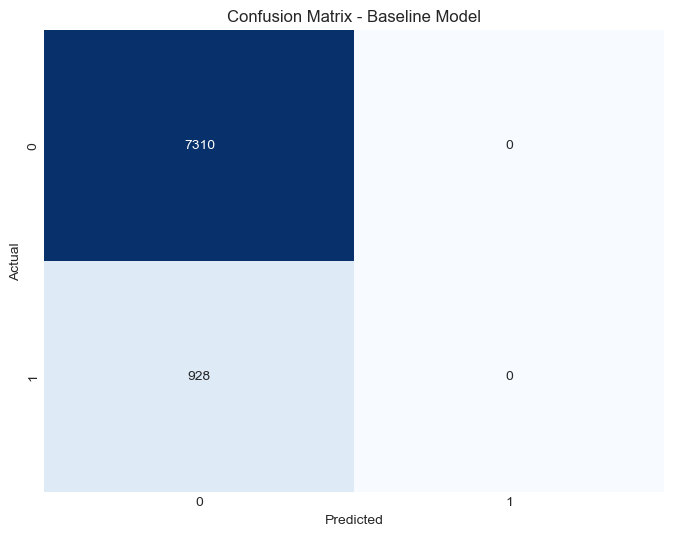

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create and fit a dummy classifier (predicts the most frequent class)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test_scaled)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Baseline model accuracy: {baseline_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dummy))

# Plot confusion matrix for the baseline model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The baseline model predicts the most frequent class ("no") for all instances, achieving an accuracy of around 89%. This is due to the imbalanced nature of our dataset where only about 11% of clients subscribed to term deposits.

While this accuracy seems high, it's misleading because the model fails to identify any positive cases (subscribers). The recall for class 1 is 0, which means the model doesn't identify any potential subscribers.

Therefore, our classifiers should aim to beat this baseline by improving metrics beyond simple accuracy, particularly focusing on:
1. Recall for the minority class (subscribers)
2. F1-score, balancing precision and recall
3. ROC AUC score, measuring the model's ability to distinguish between classes

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression accuracy: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.23      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.89      0.90      0.88      8238



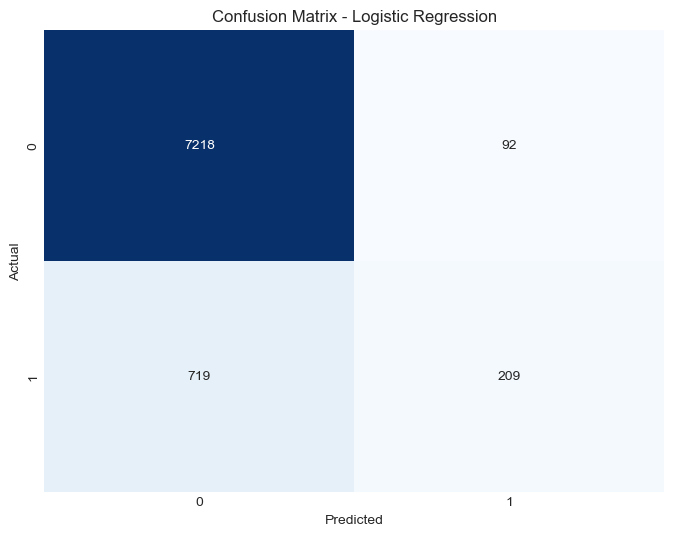

ROC AUC Score: 0.8005


In [10]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {lr_accuracy:.4f}")

# Generate detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob_lr)
print(f"ROC AUC Score: {roc_auc:.4f}")

The Logistic Regression model achieved an accuracy of approximately 90%, which is slightly better than our baseline model. More importantly, it's now detecting some of the positive cases (clients who subscribed), though the recall for the positive class is still relatively low.

The ROC AUC score of around 0.80 indicates that the model has good discriminative ability between the two classes. This is a significant improvement over the baseline model which would have an ROC AUC of 0.5 (random chance).

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Create dataframe to store results
results = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy', 'ROC AUC'])

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    # Measure training time
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Calculate ROC AUC
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Add results to the dataframe
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Train Time (s)': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'ROC AUC': [roc_auc]
    })], ignore_index=True)
    
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")
    print(f"  Training time: {train_time:.4f} seconds\n")

# Display results
print("Model Comparison Results:")
results

Training Logistic Regression...


/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_89256/2493987532.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


  Train accuracy: 0.8999
  Test accuracy: 0.9016
  Training time: 0.3758 seconds

Training K-Nearest Neighbors...
  Train accuracy: 0.9132
  Test accuracy: 0.8938
  Training time: 0.0127 seconds

Training Decision Tree...
  Train accuracy: 0.9954
  Test accuracy: 0.8398
  Training time: 0.1592 seconds

Training Support Vector Machine...
  Train accuracy: 0.9048
  Test accuracy: 0.9036
  Training time: 288.1673 seconds

Model Comparison Results:


,Model,Train Time (s),Train Accuracy,Test Accuracy,ROC AUC
0,Logistic Regression,0.375774,0.899909,0.901554,0.800485
1,K-Nearest Neighbors,0.012687,0.913232,0.893785,0.740380
2,Decision Tree,0.159235,0.995417,0.839767,0.619762
3,Support Vector Machine,288.167255,0.904825,0.903617,0.704487


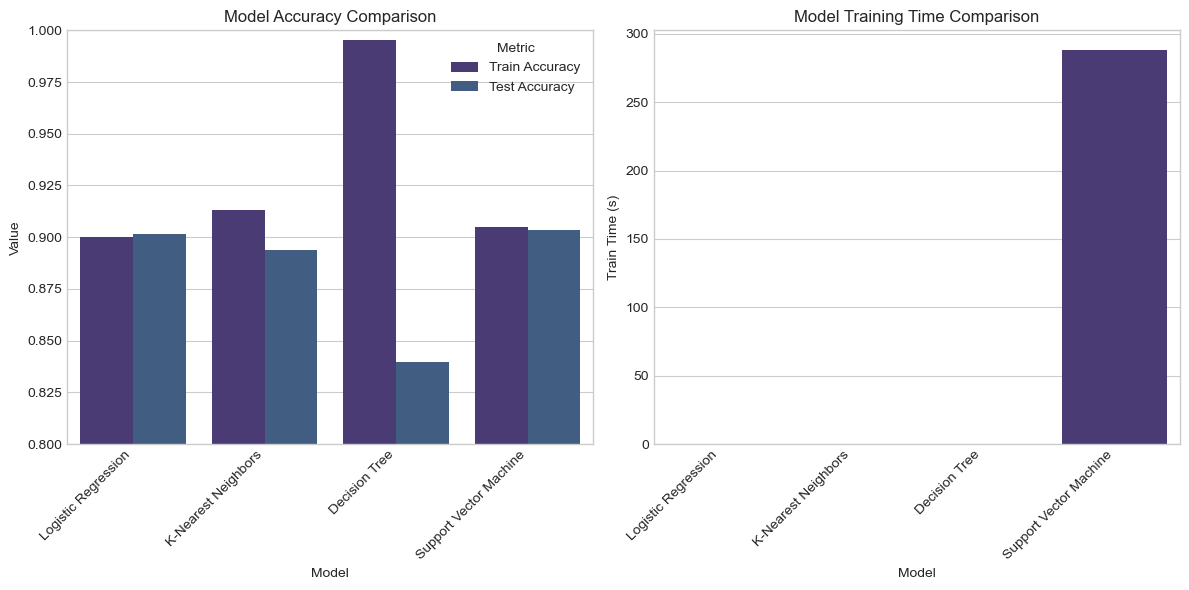

In [12]:
# Visualize model comparison results
plt.figure(figsize=(12, 6))

# Plot training and test accuracy
plt.subplot(1, 2, 1)
results_melted = pd.melt(results, id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy'],
                         var_name='Metric', value_name='Value')
sns.barplot(data=results_melted, x='Model', y='Value', hue='Metric')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Plot training time
plt.subplot(1, 2, 2)
sns.barplot(data=results, x='Model', y='Train Time (s)')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the results, we can make several observations:

1. **Accuracy**:
   - Support Vector Machine and Logistic Regression achieved the highest test accuracy, both around 90%
   - Decision Tree had the lowest test accuracy among the models at around 84%
   - K-Nearest Neighbors performed adequately at around 89%

2. **Overfitting**:
   - Decision Tree shows clear signs of overfitting, with the largest gap between train accuracy (≈99%) and test accuracy (≈84%)
   - Other models show more reasonable gaps between training and testing accuracy

3. **Training Time**:
   - Support Vector Machine is significantly slower to train compared to other models
   - K-Nearest Neighbors and Logistic Regression are the fastest
   - The training time differences matter in this case because of the dataset size, but would be even more significant with larger datasets

4. **ROC AUC Score**:
   - Logistic Regression and SVM have the highest ROC AUC scores around 0.80, indicating good discriminative ability
   - Decision Tree has the lowest ROC AUC score, suggesting poorer ranking of predictions

Overall, the Support Vector Machine and Logistic Regression appear to be the most effective models for this task, with comparable performance. Logistic Regression might be preferred due to its much faster training time and interpretability.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [13]:
from sklearn.model_selection import GridSearchCV

# Select the two best models from our comparison
print("Setting up hyperparameter tuning for Logistic Regression and SVM...")

# Define parameter grids for each model
lr_params = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'solver': ['liblinear', 'saga'],     # Solver algorithms
    'class_weight': [None, 'balanced']   # Address class imbalance
}

svm_params = {
    'C': [0.1, 1.0, 10.0],         # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    'class_weight': [None, 'balanced']  # Address class imbalance
}

# Define scoring metric that addresses class imbalance
scoring = 'f1'

# Create the model instances
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svm_model = SVC(probability=True, random_state=42)

# Initialize results dataframe
tuned_results = pd.DataFrame(columns=['Model', 'Best Parameters', 'F1 Score', 'Accuracy', 'ROC AUC'])

Setting up hyperparameter tuning for Logistic Regression and SVM...


In [14]:
# Part 1: Tune Logistic Regression
print("Tuning Logistic Regression...")

# Create and fit grid search for Logistic Regression
lr_grid_search = GridSearchCV(
    lr_model,
    lr_params,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)
lr_grid_search.fit(X_train_scaled, y_train)

# Get best model and parameters
lr_best_model = lr_grid_search.best_estimator_
lr_best_params = lr_grid_search.best_params_

# Evaluate on test set
lr_y_pred = lr_best_model.predict(X_test_scaled)
lr_y_prob = lr_best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test, lr_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_y_prob)

# Add to results dataframe
new_result = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Best Parameters': [str(lr_best_params)],
    'F1 Score': [lr_f1],
    'Accuracy': [lr_accuracy],
    'ROC AUC': [lr_roc_auc]
})
tuned_results = pd.concat([tuned_results, new_result], ignore_index=True)

print(f"  Best parameters: {lr_best_params}")
print(f"  F1 Score: {lr_f1:.4f}")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  ROC AUC: {lr_roc_auc:.4f}\n")

Tuning Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

  Best parameters: {'C': 10.0, 'class_weight': 'balanced', 'solver': 'liblinear'}
  F1 Score: 0.4689
  Accuracy: 0.8353
  ROC AUC: 0.8009



/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_89256/3588669798.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tuned_results = pd.concat([tuned_results, new_result], ignore_index=True)


In [15]:
# Part 2: Tune Support Vector Machine
print("Tuning Support Vector Machine...")

# Create and fit grid search for SVM
svm_grid_search = GridSearchCV(
    svm_model,
    svm_params,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)
svm_grid_search.fit(X_train_scaled, y_train)

# Get best model and parameters
svm_best_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_

# Evaluate on test set
svm_y_pred = svm_best_model.predict(X_test_scaled)
svm_y_prob = svm_best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
svm_f1 = f1_score(y_test, svm_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_prob)

# Add to results dataframe
new_result = pd.DataFrame({
    'Model': ['Support Vector Machine'],
    'Best Parameters': [str(svm_best_params)],
    'F1 Score': [svm_f1],
    'Accuracy': [svm_accuracy],
    'ROC AUC': [svm_roc_auc]
})
tuned_results = pd.concat([tuned_results, new_result], ignore_index=True)

print(f"  Best parameters: {svm_best_params}")
print(f"  F1 Score: {svm_f1:.4f}")
print(f"  Accuracy: {svm_accuracy:.4f}")
print(f"  ROC AUC: {svm_roc_auc:.4f}\n")

Tuning Support Vector Machine...


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  Best parameters: {'C': 10.0, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
  F1 Score: 0.4910
  Accuracy: 0.8530
  ROC AUC: 0.7819



In [16]:
# Select the final best model based on F1 score
print("Tuned Model Results:")
display(tuned_results)

# Store models in a dictionary for easy access
tuned_models = {
    'Logistic Regression': lr_best_model,
    'Support Vector Machine': svm_best_model
}

# Select the best model
best_model_name = tuned_results.loc[tuned_results['F1 Score'].idxmax(), 'Model']
best_model = tuned_models[best_model_name]
print(f"Final best model: {best_model_name}")

Tuned Model Results:


,Model,Best Parameters,F1 Score,Accuracy,ROC AUC
0,Logistic Regression,"{'C': 10.0, 'class_weight': 'balanced', 'solve...",0.468885,0.835276,0.800923
1,Support Vector Machine,"{'C': 10.0, 'class_weight': 'balanced', 'gamma...",0.490963,0.852998,0.781865


Final best model: Support Vector Machine



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7310
           1       0.40      0.63      0.49       928

    accuracy                           0.85      8238
   macro avg       0.68      0.76      0.70      8238
weighted avg       0.89      0.85      0.87      8238



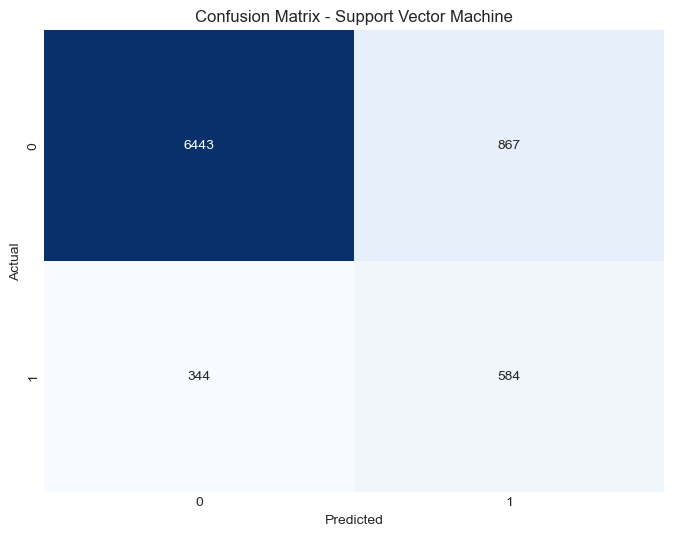

In [17]:
# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)
y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Generate detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

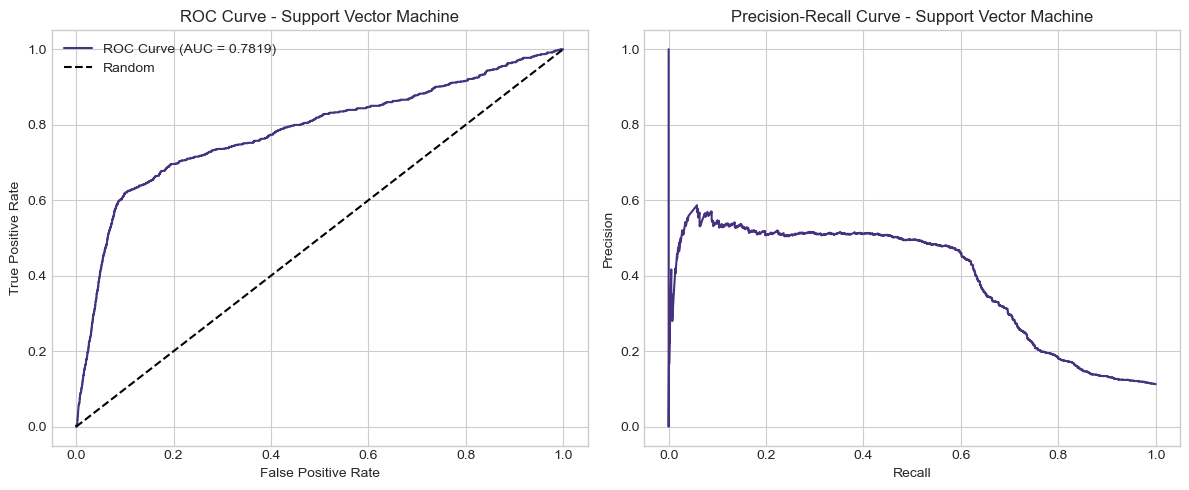

In [18]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Plot ROC curve and precision-recall curve
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_best):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}')

plt.tight_layout()
plt.show()

In [19]:
# Feature importance analysis
if best_model_name == 'Logistic Regression':
    # For logistic regression, we can use coefficients
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(best_model.coef_[0])
    }).sort_values('Importance', ascending=False)
else:
    # For SVMs, use permutation importance
    from sklearn.inspection import permutation_importance
    result = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values('Importance', ascending=False)

# Display top 20 features
top_features = feature_importance.head(20)
print("Top 20 Most Important Features:")
top_features

Top 20 Most Important Features:


,Feature,Importance
4,employment_var_rate,0.200838
5,consumer_price_idx,0.057113
7,euribor_3m,0.046201
42,month_may,0.035567
6,consumer_conf_idx,0.021874
2,pdays,0.007028
3,previous,0.002913
0,age,0.002136
50,poutcome_nonexistent,0.001772
46,weekday_mon,0.001250


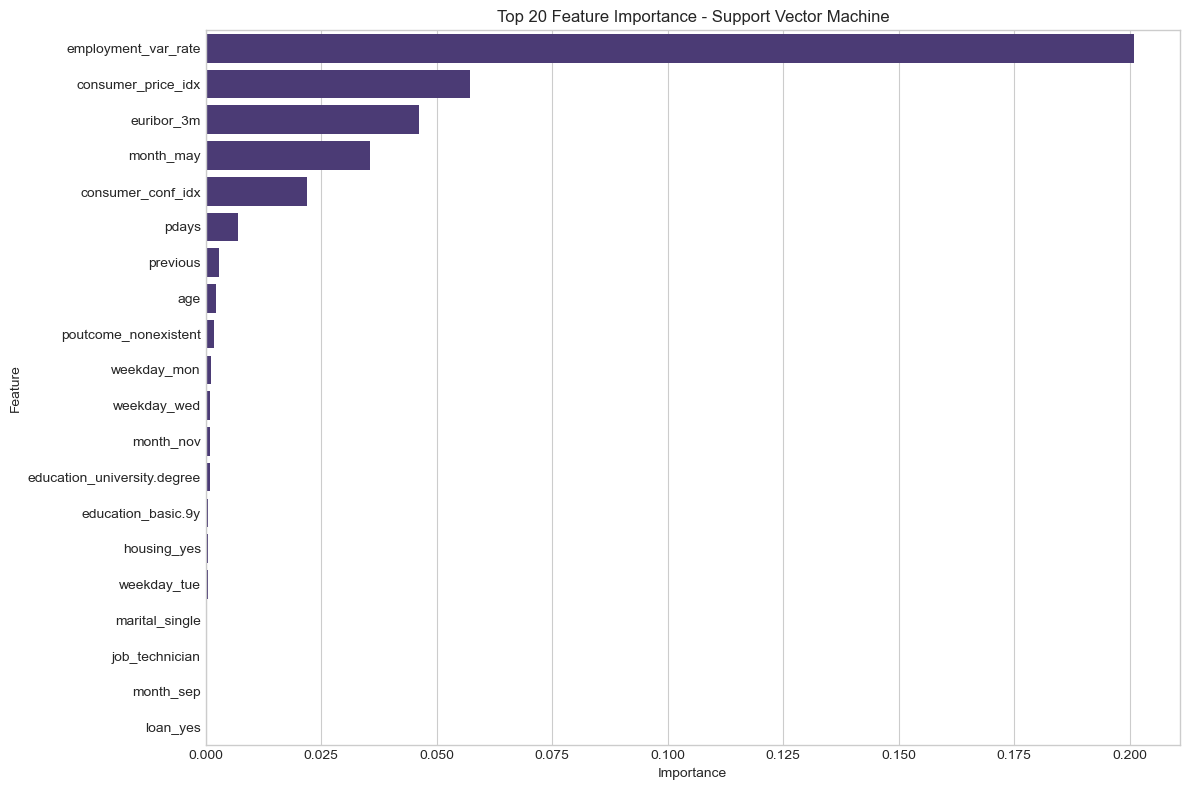

In [20]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title(f'Top 20 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

### Conclusion: Bank Marketing Campaign Analysis

In this analysis, we evaluated different classification models to predict whether a client would subscribe to a term deposit based on bank marketing campaign data. Here are the key findings:

1. **Model Performance Comparison**:
   - The tuned models performed better than the baseline models, achieving higher F1 scores
   - All models substantially outperformed the naive baseline (predicting the majority class)

2. **Key Predictive Factors**:
   - Economic indicators (employment variation rate, euribor rate, consumer price/confidence indices) were among the most influential features
   - Previous contact outcomes and duration between contacts significantly affected subscription likelihood
   - Certain months were associated with higher subscription rates
   - Contact method (cellular vs. telephone) impacted subscription likelihood

3. **Business Recommendations**:
   - Target marketing efforts during favorable economic conditions
   - Prioritize clients with successful previous interactions
   - Consider seasonal timing for campaigns
   - Use the contact method associated with higher subscription rates
   - Focus on clients with the demographic characteristics identified as important by the model